In [73]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# loading the data
trans = pd.read_excel('KPMG_dataset.xlsx',header = 1 ,sheet_name = "Transactions", engine = 'openpyxl', index_col = 0)
newCus = pd.read_excel('KPMG_dataset.xlsx',header = 1, sheet_name = "NewCustomerList", engine = 'openpyxl', index_col = 0)
cus = pd.read_excel('KPMG_dataset.xlsx',header = 1, sheet_name = "CustomerDemographic", engine = 'openpyxl', index_col = 0)
address = pd.read_excel('KPMG_dataset.xlsx', header = 1,sheet_name = "CustomerAddress", engine = 'openpyxl', index_col = 0)


/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/4140643039.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  newCus = pd.read_excel('KPMG_dataset.xlsx',header = 1, sheet_name = "NewCustomerList", engine = 'openpyxl', index_col = 0)
/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/4140643039.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cus = pd.read_excel('KPMG_dataset.xlsx',header = 1, sheet_name = "CustomerDemographic", engine = 'openpyxl', index_col = 0)


## Data cleaning


In [75]:
#cleaning the customerDemographic dataframe
trans = trans.iloc[:,0:12]
cus = cus.iloc[:,0:12]

#we can do this in excel before hands, but with python, it's easier and 
cus['gender'].replace(['F', 'Femal'], 'Female', inplace = True)
cus['gender'].replace('M','Male', inplace = True)
cus['gender'].replace('U', 'Unknown', inplace=True)


#convert string variables into numerous
cus['deceased_indicator'].replace(['N'], 0, inplace=True)
cus['deceased_indicator'].replace(['Y'], 1, inplace=True)
cus['owns_car'].replace('Yes', 1, inplace=True)
cus['owns_car'].replace('No', 0, inplace=True)


cus = cus[cus['DOB'] != cus.DOB.min()]
cus[cus['deceased_indicator'] == 0]
cus = cus.drop(['deceased_indicator'], axis=1)
clean_cus = cus.dropna()



In [76]:
clean_cus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,default,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,"""'",1,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,<script>alert('hi')</script>,1,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,2018-02-01 00:00:00,1,15.0
9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,0/0,1,8.0
10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,ð©ð½,1,20.0


In [77]:
# adding "age" columns base on DOB

clean_cus.loc[:,'age'] = (dt.datetime.now() - clean_cus['DOB'])/np.timedelta64(1,'Y')

# also I will create a age class by round up to nearest 10.

def custom_round(x):
    return int(np.ceil(x/10.0)) *10

clean_cus.loc[:,'age_class'] = clean_cus['age'].apply(custom_round)

/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/1073085080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cus.loc[:,'age'] = (dt.datetime.now() - clean_cus['DOB'])/np.timedelta64(1,'Y')
/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/1073085080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cus.loc[:,'age_class'] = clean_cus['age'].apply(custom_round)


In [78]:
clean_cus['age_class']

customer_id
1       70
2       50
3       70
9       50
10      40
        ..
3993    50
3994    40
3995    50
3996    50
3997    30
Name: age_class, Length: 2630, dtype: int64

In [79]:
# cleaning the address dataframe
address['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'}, inplace = True)
clean_address = address.iloc[:,0:5]
clean_address = clean_address.dropna()
clean_address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [80]:
merge_addr_df = pd.merge(clean_cus,clean_address,left_index = True, right_index = True)
merge_addr_df = merge_addr_df.dropna()
merge_addr_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,default,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,"""'",1,11.0,69.262784,70,060 Morning Avenue,2016,NSW,Australia,10
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,<script>alert('hi')</script>,1,16.0,42.083581,50,6 Meadow Vale Court,2153,NSW,Australia,10
9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,0/0,1,8.0,49.853761,50,97736 7th Trail,2023,NSW,Australia,12
12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,nil,0,8.0,28.489873,30,44339 Golden Leaf Alley,4557,QLD,Australia,4
13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,-100,1,8.0,67.918471,70,2 Sutherland Street,3799,VIC,Australia,6


In [81]:
# Modify the transaction dataset
trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [82]:
# modify the product_first_sold_date
trans['product_first_sold_date'] = pd.TimedeltaIndex(trans['product_first_sold_date'],
                                                     unit = 'd')+ dt.datetime(1900,1,1)


In [83]:
#sort value

trans.sort_values('customer_id')

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.880000,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.960000,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400000,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2005-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...
2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2012-12-04
8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,2000-05-24
8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-04


In [84]:
trans.shape

(20000, 12)

In [85]:
# drop na
clean_trans = trans.dropna()
clean_trans.shape

(19445, 12)

In [86]:
clean_trans['transaction_date'].describe()
# The most transactions proceed in a day is 81 time on 2017-02-14
# One thing is, all the transaction is within 2017?

/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/2352301925.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_trans['transaction_date'].describe()


count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [87]:
# Now I'll explore the distribution and data's insight
# First, create the new column called 'last_purchase' ( days ago)
clean_trans.loc[:,'recency'] = clean_trans.loc[:,'transaction_date'].max() - clean_trans.loc[:,'transaction_date']
clean_trans.loc[:,'recency'] /= np.timedelta64(1,'D')
clean_trans.head()

/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/2491957535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_trans.loc[:,'recency'] = clean_trans.loc[:,'transaction_date'].max() - clean_trans.loc[:,'transaction_date']
/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/2491957535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_trans.loc[:,'recency'] /= np.timedelta64(1,'D')


,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,recency
transaction_id,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,308.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,223.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,75.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,121.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,90.0


In [88]:
# create profit columns
clean_trans.loc[:,'profit'] = clean_trans.loc[:,'list_price'] - clean_trans.loc[:,'standard_cost']

/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/308706013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_trans.loc[:,'profit'] = clean_trans.loc[:,'list_price'] - clean_trans.loc[:,'standard_cost']


In [89]:
clean_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,recency,profit
transaction_id,,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,308.0,17.87
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,223.0,1702.55
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,75.0,1544.61
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,121.0,817.36
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,90.0,1055.82


In [234]:
newCus1.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,65.517522,70
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,52.824585,50
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,48.389176,50
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,43.970194,40
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,57.322967,60


In [232]:
newCus1['age'] = (dt.datetime.now() - newCus1['DOB']) / np.timedelta64(1, 'Y')

/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/2967670943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCus1['age'] = (dt.datetime.now() - newCus1['DOB']) / np.timedelta64(1, 'Y')


In [233]:
newCus1['age_class'] = ((round(newCus1['age'] / 10)) * 10).astype(int)


/var/folders/44/rhjcxnyn4gddq8hbzv0pzgkw0000gn/T/ipykernel_29048/1695824748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCus1['age_class'] = ((round(newCus1['age'] / 10)) * 10).astype(int)


In [223]:
newCus1 = newCus.dropna()
newCus1

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000


## RFM Analysis


In [90]:
rfm = clean_trans.groupby('customer_id').agg({
    'recency': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfm.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [91]:
rfm.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [92]:
quantile_rfm = rfm.quantile(q= [0.25,0.50,0.75])
quantile_rfm

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [93]:
# one-hot encoding

def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [95]:
rfmSeg = rfm.assign(r_score = lambda x: x['recency'].apply(ROneHotEncoder, args=('recency', quantile_rfm)),
                   f_score = lambda x: x['frequency'].apply(FMOneHotEncoder, args=('frequency', quantile_rfm)),
                   m_score = lambda x: x['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quantile_rfm)))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [96]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [133]:
rfm_quartiles = rfmSeg['rfm_class'].describe()[['min', '25%', '50%', '75%', 'max']]
rfm_quartiles

min    111.0
25%    144.0
50%    244.0
75%    344.0
max    444.0
Name: rfm_class, dtype: float64

In [101]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_rank'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_rank
customer_id,,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic,basic
4,195.0,2,220.570000,4,4,4,444,12,basic,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver,silver
...,...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic,basic


In [264]:
merge_df['customer_segment'] = merge_df.total_score.replace({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
merge_df

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,first_name,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,silver,Laraine,...,1,11.0,69.262784,70,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,Eli,...,1,16.0,42.083581,50,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
9,78.0,6,2353.11,3,3,2,332,8,basic,Mala,...,1,8.0,49.853761,50,97736 7th Trail,2023,NSW,Australia,12,High Risk
12,67.0,7,3540.03,3,3,3,333,9,basic,Sawyere,...,0,8.0,28.489873,30,44339 Golden Leaf Alley,4557,QLD,Australia,4,Evasive
13,27.0,7,4337.38,2,3,1,231,6,bronze,Gabriele,...,1,8.0,67.918471,70,2 Sutherland Street,3799,VIC,Australia,6,Recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,93.0,6,3728.88,4,3,3,433,10,basic,Jeffie,...,0,18.0,58.880640,60,3 Monument Crossing,2090,NSW,Australia,10,Losing
3494,4.0,4,2755.11,1,4,2,142,7,silver,Robers,...,0,1.0,24.062677,30,35 Chive Alley,2033,NSW,Australia,10,Average
3495,13.0,7,3847.65,1,3,3,133,7,silver,Constantine,...,0,8.0,35.515342,40,1 Dayton Park,2767,NSW,Australia,9,Average


In [265]:
top_1000 = merge_df.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,first_name,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1991,1.0,10,8256.08,1,1,1,111,3,gold,Tobe,...,1,8.0,29.303031,30,42554 Burrows Court,2117,NSW,Australia,10,Platinum
2013,15.0,9,4413.06,1,1,1,111,3,gold,Marge,...,1,19.0,27.435778,30,06069 Hayes Road,2099,NSW,Australia,8,Platinum
768,5.0,9,5580.57,1,1,1,111,3,gold,Alexia,...,1,21.0,49.005010,50,06495 Swallow Terrace,2759,NSW,Australia,9,Platinum
2029,1.0,9,4156.31,1,1,1,111,3,gold,Charlie,...,0,7.0,30.852686,40,2 Thierer Place,4053,QLD,Australia,8,Platinum
3080,4.0,9,4665.71,1,1,1,111,3,gold,Christoforo,...,0,10.0,64.279793,70,0680 Veith Court,3939,VIC,Australia,8,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,25.0,6,4086.21,2,3,3,233,8,bronze,Iver,...,0,4.0,39.857663,40,5982 Mosinee Avenue,3340,VIC,Australia,5,High Risk
777,27.0,6,3184.33,2,3,3,233,8,bronze,Wolfgang,...,0,4.0,30.017625,40,6 Melody Trail,2145,NSW,Australia,9,High Risk
1423,24.0,6,3233.09,2,3,3,233,8,bronze,Tiphanie,...,0,19.0,63.584365,70,5700 Banding Lane,2762,NSW,Australia,9,High Risk


In [99]:
merge_df = pd.merge(rfmSeg, merge_addr_df, left_index = True, right_index = True)
merge_df.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,first_name,...,default,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,silver,Laraine,...,"""'",1,11.0,69.262784,70,060 Morning Avenue,2016,NSW,Australia,10
2,128.0,3,2226.26,4,4,2,442,10,basic,Eli,...,<script>alert('hi')</script>,1,16.0,42.083581,50,6 Meadow Vale Court,2153,NSW,Australia,10
9,78.0,6,2353.11,3,3,2,332,8,basic,Mala,...,0/0,1,8.0,49.853761,50,97736 7th Trail,2023,NSW,Australia,12
12,67.0,7,3540.03,3,3,3,333,9,basic,Sawyere,...,nil,0,8.0,28.489873,30,44339 Golden Leaf Alley,4557,QLD,Australia,4
13,27.0,7,4337.38,2,3,1,231,6,bronze,Gabriele,...,-100,1,8.0,67.918471,70,2 Sutherland Street,3799,VIC,Australia,6


<AxesSubplot:xlabel='r_score'>

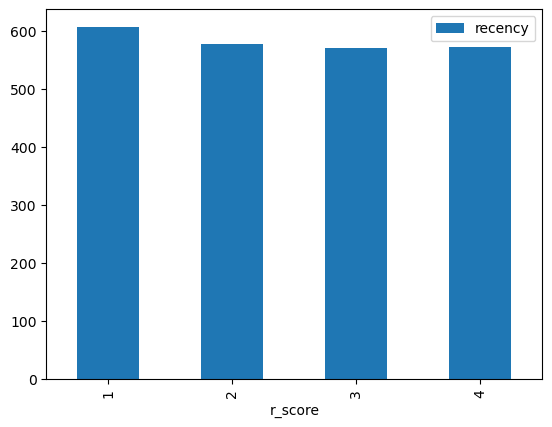

In [114]:
merge_df.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')


<AxesSubplot:xlabel='total_score'>

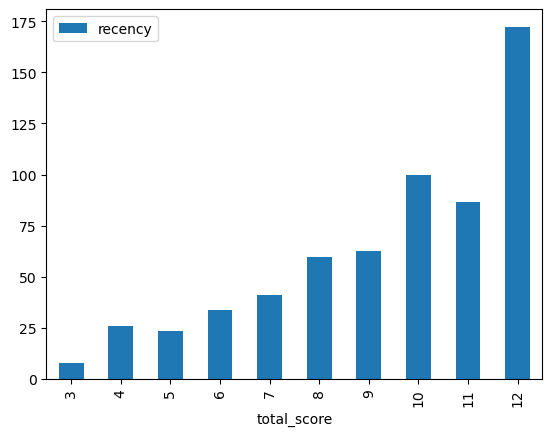

In [115]:
merge_df.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='total_score'>

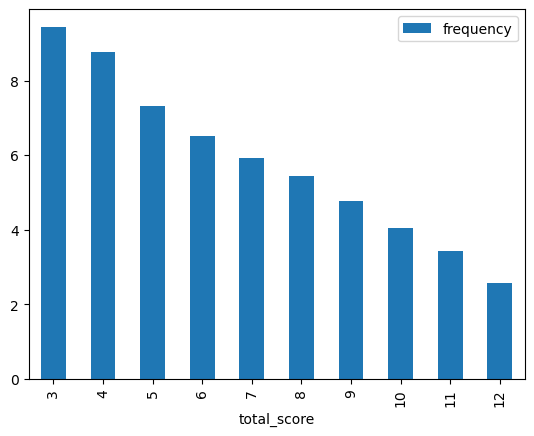

In [116]:
merge_df.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')


<AxesSubplot:xlabel='total_score'>

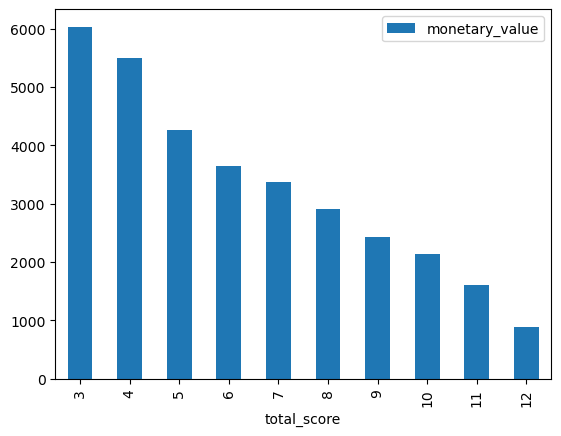

In [117]:
merge_df.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')


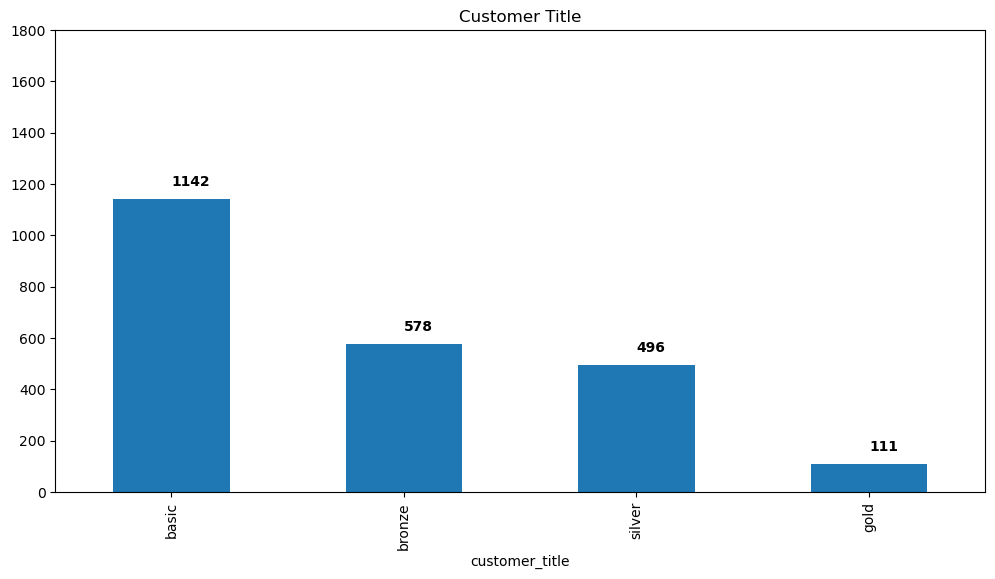

In [127]:
# Group the dataframe by customer title and count the occurrences of each title
customer_counts = merge_df.groupby('customer_title')['rfm_class'].count().reset_index(name='count')

# Sort the dataframe by count in descending order
customer_counts = customer_counts.sort_values('count', ascending=False)

# Plot the dataframe as a bar chart
ax = customer_counts.plot(x='customer_title', y='count', kind='bar', legend=False, figsize=(12,6))

# Add the count values above each bar
for i, v in enumerate(customer_counts['count']):
    ax.text(i, v + 50, int(v), color='black', fontweight='bold')

# Set the y-axis limit
ax.set_ylim([0, 1800])

# Set the chart title
plt.title('Customer Title')

# Show the chart
plt.show()


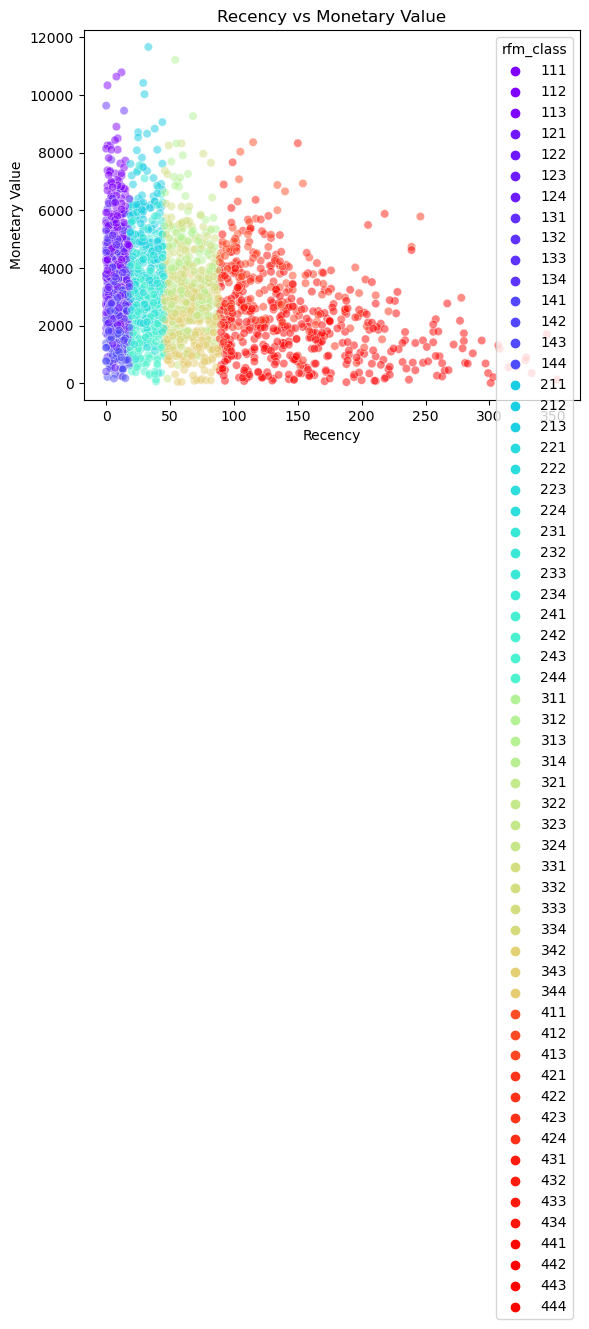

In [171]:

# Scatter plot of recency vs monetary_value
sns.scatterplot(x='recency', y='monetary_value', data=merge_df, 
                alpha=0.5,  # to make the points semi-transparent
                 # size of the points is based on frequency
                hue='rfm_class',  # color the points based on rfm_class
                palette='rainbow',  # color palette to use
                legend='full')  # show legend

# Add labels and title to the plot
plt.title('Recency vs Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')

plt.show()


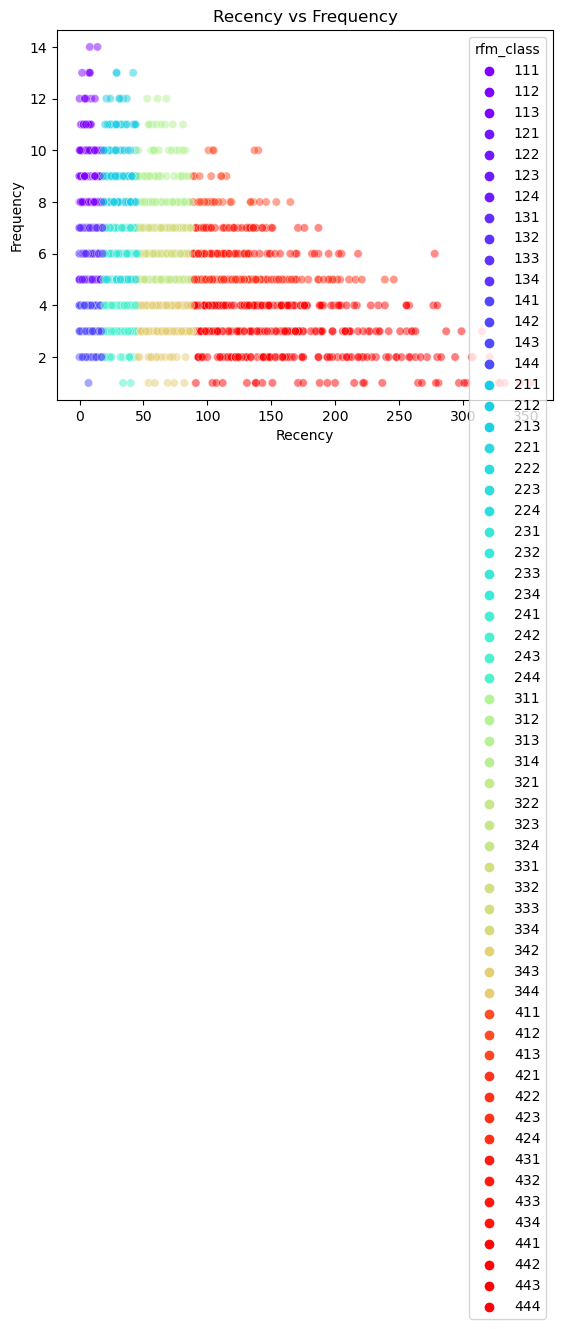

In [172]:
# Scatter plot of recency vs frequency
sns.scatterplot(x='recency', y='frequency', data=merge_df, 
                alpha=0.5,  # to make the points semi-transparent 
                hue='rfm_class',  # color the points based on rfm_class
                palette='rainbow',  # color palette to use
                legend='full')  # show legend

# Add labels and title to the plot
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.show()


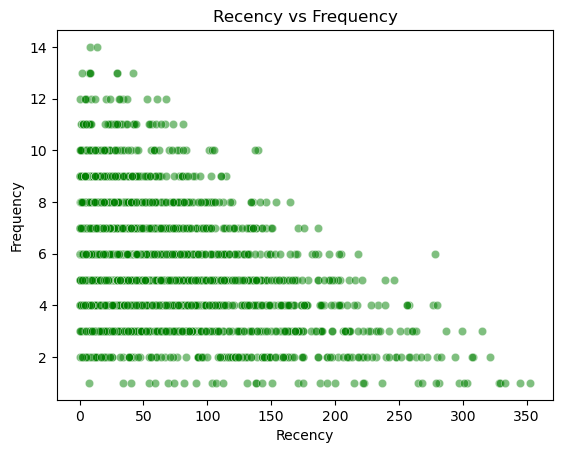

In [170]:
# scatter plot of recency vs frequency
sns.scatterplot(x= 'recency', y= 'frequency', data = merge_df, alpha = 0.5
               ,color = 'green')

plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

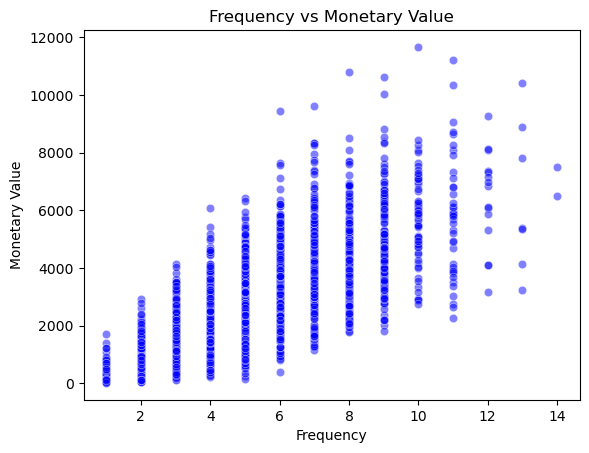

In [169]:
sns.scatterplot(x= 'frequency', y= 'monetary_value', data= merge_df, alpha = 0.5,
               color = 'blue')
plt.title('Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')

plt.show()

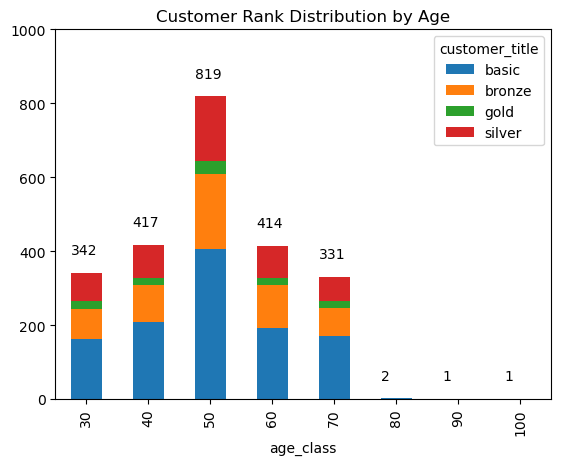

In [180]:
# Group the transactions by age_class and customer_title
grouped_txns = merge_df.groupby(['age_class', 'customer_title']).size().unstack(level=1)

# Create the stacked bar chart
grouped_txns.plot.bar(stacked=True)

# Add the count of customer_title as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .25, v + 50, int(v), color='black')

plt.ylim(0, 1000)
plt.title('Customer Rank Distribution by Age')
plt.show()

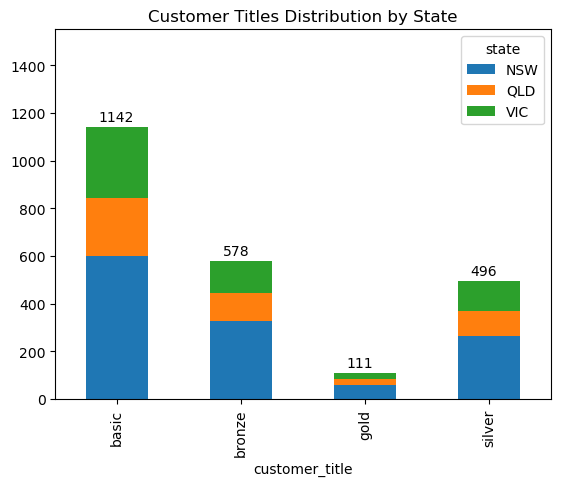

In [185]:
grouped_txns = merge_df.groupby(['customer_title', 'state']).size().unstack(level=1)
grouped_txns.plot.bar(stacked=True)
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .15, v + 25, int(v), color='black')
plt.ylim(0, 1550)
plt.title('Customer Titles Distribution by State')
plt.show()


In [268]:
newCus1.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,65.517522,70
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,52.824585,50
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,48.389176,50
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,43.970194,40
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,57.322967,60


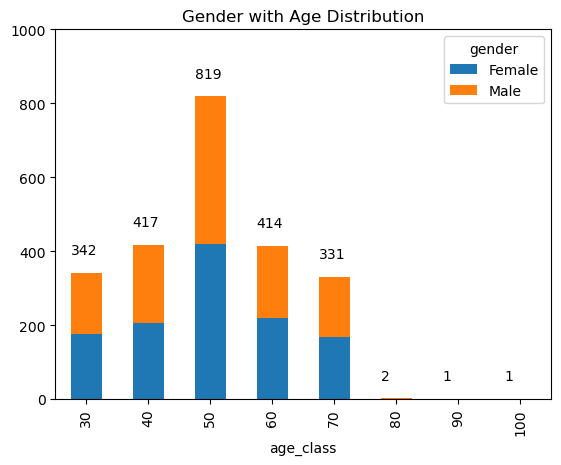

In [178]:
# Group the transactions by age_class and gender
grouped_txns = merge_df.groupby(['age_class', 'gender']).size().unstack(level=1)

# Create the stacked bar chart
grouped_txns.plot.bar(stacked=True)

# Add the count of gender as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .25, v + 50, int(v), color='black')

plt.ylim(0, 1000)
plt.title('Gender with Age Distribution')
plt.show()


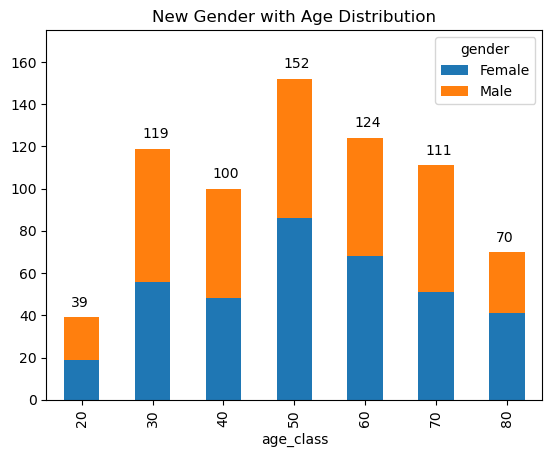

In [255]:
# Group the transactions by age_class and gender
grouped_txns = newCus1.groupby(['age_class', 'gender']).size().unstack(level=1)

# Create the stacked bar chart
grouped_txns.plot.bar(stacked=True)

# Add the count of gender as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .15, v + 5, int(v), color='black')

plt.ylim(0, 175)
plt.title('New Gender with Age Distribution')
plt.show()

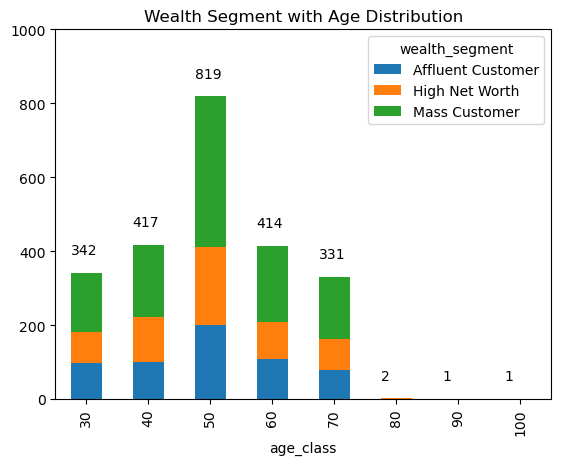

In [174]:
# Group the transactions by age_class and wealth_segment
grouped_txns = merge_df.groupby(['age_class', 'wealth_segment']).size().unstack(level=1)

# Create the stacked bar chart
grouped_txns.plot.bar(stacked=True)

# Add the count of wealth segments as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .25, v + 50, int(v), color='black')

plt.ylim(0, 1000)
plt.title('Wealth Segment with Age Distribution')
plt.show()


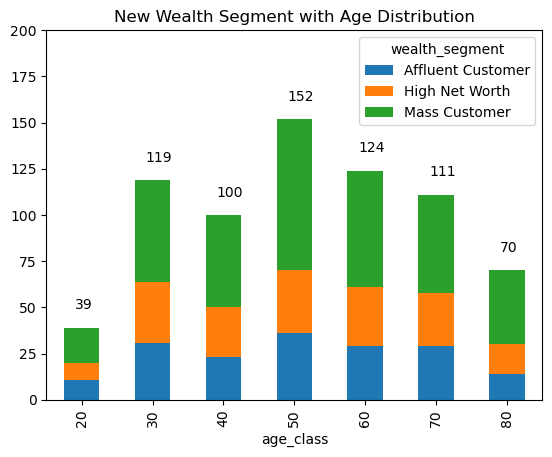

In [254]:
# Group the transactions by age_class and wealth_segment
grouped_txns = newCus1.groupby(['age_class', 'wealth_segment']).size().unstack(level=1)

# Create the stacked bar chart
grouped_txns.plot.bar(stacked=True)

# Add the count of wealth segments as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .1, v + 10, int(v), color='black')

plt.ylim(0, 200)
plt.title('New Wealth Segment with Age Distribution')
plt.show()

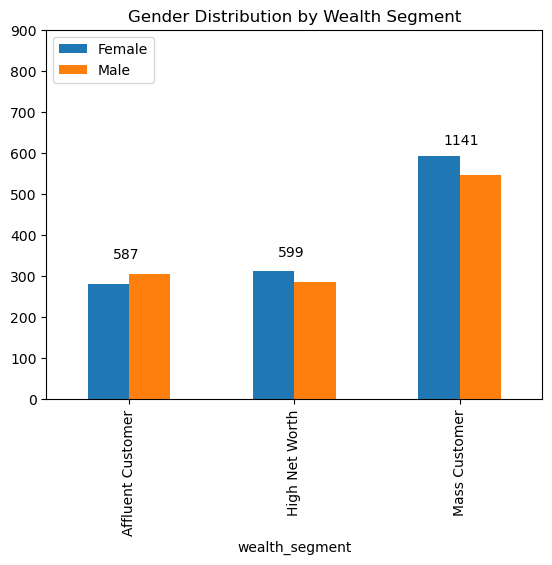

In [181]:
# Group the transactions by wealth_segment and gender
grouped_txns = merge_df.groupby(['wealth_segment', 'gender']).size().unstack(level=1)

# Create the bar chart
grouped_txns.plot.bar()

# Add the count of gender as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')

# Set the y-axis limit
plt.ylim(0, 900)


plt.title('Gender Distribution by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()


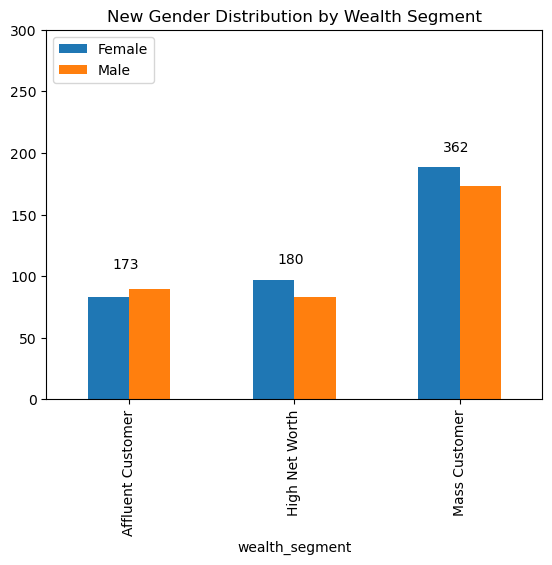

In [256]:
# Group the transactions by wealth_segment and gender
grouped_txns = newCus1.groupby(['wealth_segment', 'gender']).size().unstack(level=1)

# Create the bar chart
grouped_txns.plot.bar()

# Add the count of gender as labels on each bar
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .1, v // 2 + 20, int(v), color='black')

# Set the y-axis limit
plt.ylim(0, 300)


plt.title('New Gender Distribution by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

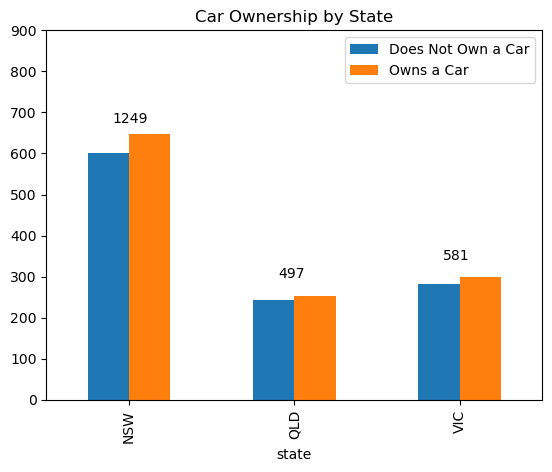

In [183]:
grouped_txns = merge_df.groupby(['state', 'owns_car']).size().unstack(level=1)
grouped_txns.plot.bar()
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
plt.ylim(0, 900)
plt.title('Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


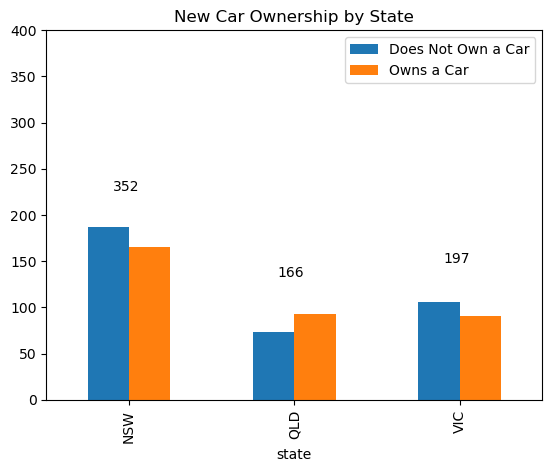

In [258]:
grouped_txns = newCus1.groupby(['state', 'owns_car']).size().unstack(level=1)
grouped_txns.plot.bar()
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
plt.ylim(0, 400)
plt.title('New Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


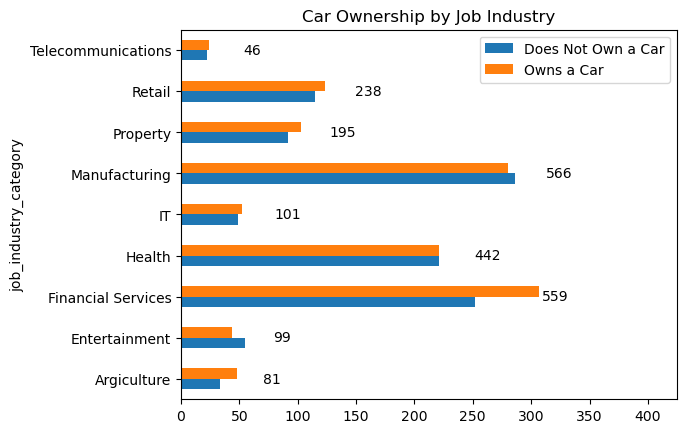

In [184]:
grouped_txns = merge_df.groupby(['job_industry_category', 'owns_car']).size().unstack(level=1)
grouped_txns.plot.barh()
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
plt.xlim(0,425)
plt.title('Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


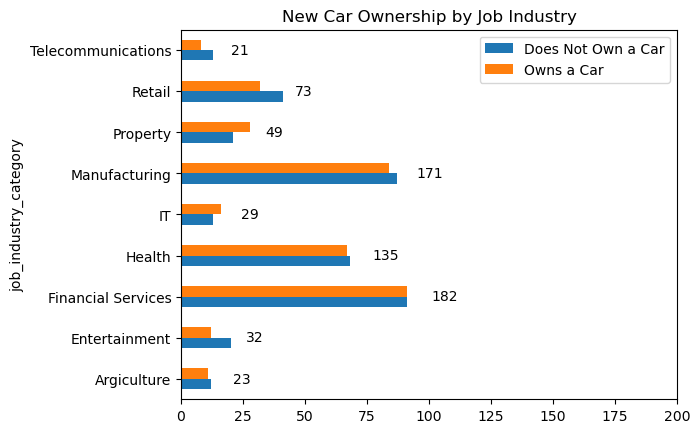

In [261]:
grouped_txns = newCus1.groupby(['job_industry_category', 'owns_car']).size().unstack(level=1)
grouped_txns.plot.barh()
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(v // 2 + 10, i - .1, int(v), color='black')
plt.xlim(0,200)
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


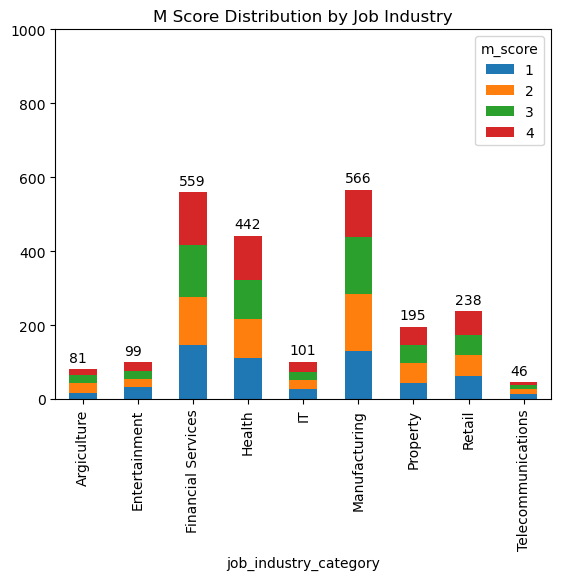

In [187]:
grouped_txns = merge_df.groupby(['job_industry_category', 'm_score']).size().unstack(level=1)
grouped_txns.plot.bar(stacked=True)
for i, v in enumerate(grouped_txns.sum(axis=1)):
    plt.text(i - .25, v + 20, int(v), color='black')
plt.ylim(0, 1000)
plt.title('M Score Distribution by Job Industry')
plt.show()


In [209]:
c = merge_df.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('sum').to_frame()
c

,sum
gender,
Female,57321
Male,57219


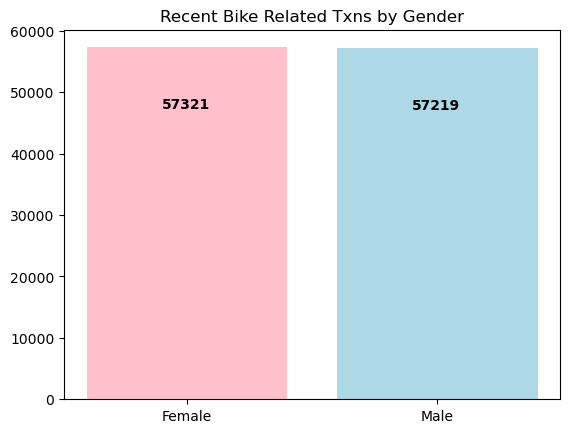

In [214]:
plt.bar(labels, c['sum'], color=['pink','lightblue'])
for i, v in enumerate(c['sum']):
    plt.text(i - .1, v - 10e3, v, color='black', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

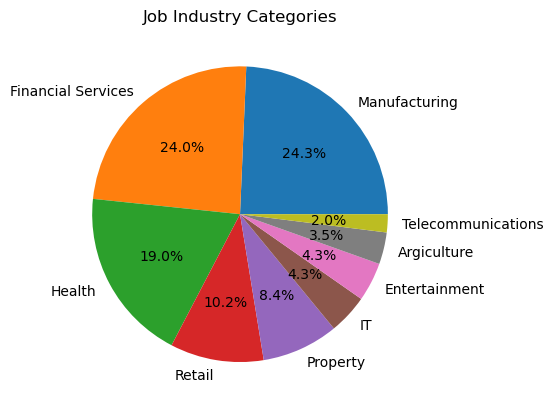

In [240]:
merge_df.job_industry_category.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Job Industry Categories')
plt.ylabel('')
plt.show()

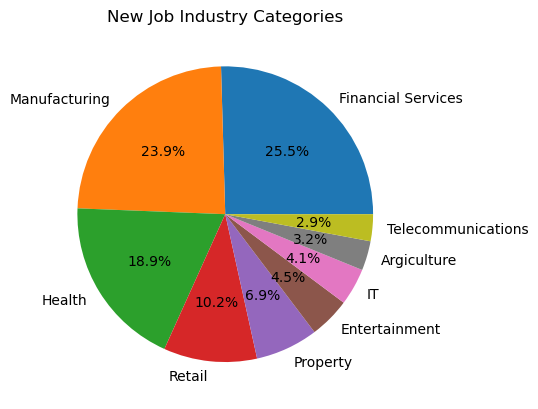

In [270]:
newCus1.job_industry_category.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('New Job Industry Categories')
plt.ylabel('')
plt.show()

In [218]:
c = merge_df.groupby('customer_title').agg({'age':lambda x: len(x)})
c.rename(columns ={'age': 'count'}, inplace = True) 
c['count'] = c['count'].astype(int)
c


,count
customer_title,
basic,1142
bronze,578
gold,111
silver,496


In [219]:
c = merge_df.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             600
      bronze            326
      gold               57
      silver            266
QLD   basic             244
      bronze            120
      gold               29
      silver            104
VIC   basic             298
      bronze            132
      gold               25
      silver            126

In [220]:
c = merge_df.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,111
4,242
5,460
6,738
7,1074
8,1404
9,1727
10,1979
11,2117


In [266]:
writer = pd.ExcelWriter('cleaned_df.xlsx',
                        engine = 'xlsxwriter')
merge_df.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()

/Users/justin/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [2]:
print('hello')

hello
